## Healthcare Analytics - Predict Insurance Charges

In [1]:
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [2]:
## Set the data path
data = 'C:/Users/SK/Desktop/SK/NUS EBA/Semester 4/Health Analytics/Health Analytics/Workshop Dataset/Insurance.csv'

In [3]:
## Read the file
insurance = pd.read_csv(data)

In [4]:
## Explore the data
insurance.head(10)

,age,gender,bmi,children,smoker,region,charges
0,20,male,30.115,5,no,northeast,4915.05985
1,20,female,30.590,0,no,northeast,2459.72010
2,20,female,28.785,0,no,northeast,2457.21115
3,20,male,40.470,0,no,northeast,1984.45330
4,20,male,27.930,0,no,northeast,1967.02270
5,21,male,20.235,3,no,northeast,3861.20965
6,21,male,25.745,2,no,northeast,3279.86855
7,21,female,16.815,1,no,northeast,3167.45585
8,21,female,22.135,0,no,northeast,2585.85065
9,21,male,27.360,0,no,northeast,2104.11340


In [5]:
insurance.describe()

,age,bmi,children,charges
count,836.000000,836.000000,836.000000,836.000000
mean,40.907895,30.646178,1.133971,7338.266565
std,12.419412,6.018097,1.220089,3431.399062
min,20.000000,16.815000,0.000000,1391.528700
25%,30.000000,26.407500,0.000000,4433.783850
50%,41.000000,30.275000,1.000000,7156.823950
75%,51.000000,34.305000,2.000000,10201.988150
max,64.000000,50.380000,5.000000,13981.850350


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 7 columns):
age         836 non-null int64
gender      836 non-null object
bmi         836 non-null float64
children    836 non-null int64
smoker      836 non-null object
region      836 non-null object
charges     836 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 45.8+ KB


Text(0, 0.5, 'count')

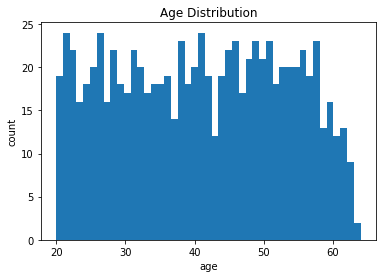

In [7]:
## Explore the distribution for Age variable
length = len(np.unique(insurance["age"]))
ageHist = plt.hist(insurance["age"], bins = length)
plt.title("Age Distribution")
plt.xlabel("age")
plt.ylabel("count")

In [8]:
print("Count of Age=\n", ageHist[0])

Count of Age=
 [19. 24. 22. 16. 18. 20. 24. 16. 22. 18. 17. 22. 20. 17. 18. 18. 19. 14.
 23. 18. 20. 24. 19. 12. 19. 22. 23. 17. 21. 23. 21. 23. 18. 20. 20. 20.
 22. 19. 23. 13. 16. 12. 13.  9.  2.]


In [9]:
minAge = min(insurance["age"])
maxAge = max(insurance["age"])
print("Min Age= ", minAge, "and Max Age=", maxAge )
print("Histogram Bins =\n", ageHist[1])

Min Age=  20 and Max Age= 64
Histogram Bins =
 [20.         20.97777778 21.95555556 22.93333333 23.91111111 24.88888889
 25.86666667 26.84444444 27.82222222 28.8        29.77777778 30.75555556
 31.73333333 32.71111111 33.68888889 34.66666667 35.64444444 36.62222222
 37.6        38.57777778 39.55555556 40.53333333 41.51111111 42.48888889
 43.46666667 44.44444444 45.42222222 46.4        47.37777778 48.35555556
 49.33333333 50.31111111 51.28888889 52.26666667 53.24444444 54.22222222
 55.2        56.17777778 57.15555556 58.13333333 59.11111111 60.08888889
 61.06666667 62.04444444 63.02222222 64.        ]


Text(0, 0.5, 'Count')

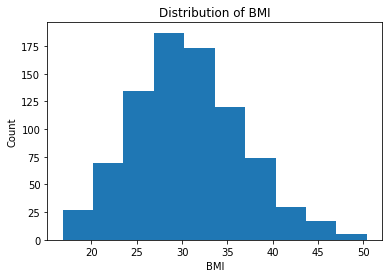

In [10]:
## Explore the info about bmi
bmiHist = plt.hist(insurance["bmi"], bins = 10)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Count")

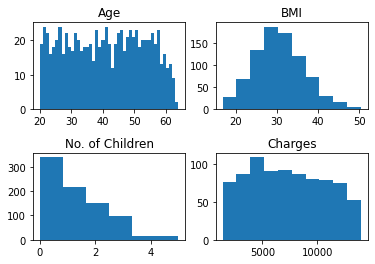

In [11]:
plt.subplot(2, 2, 1)
plt.hist(insurance["age"], bins = len(np.unique(insurance["age"])))
plt.title('Age')
plt.subplot(2, 2, 2)
plt.hist(insurance["bmi"], bins = 10)
plt.title('BMI')
plt.subplot(2, 2, 3)
plt.hist(insurance["children"], bins = len(np.unique(insurance["children"])))
plt.title('No. of Children')
plt.subplot(2, 2, 4)
plt.hist(insurance["charges"], bins = 10)
plt.title('Charges')
plt.subplots_adjust(hspace=0.5)

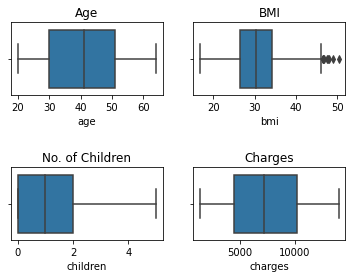

In [12]:
#explore insurance dataset via boxplots 
plt.subplot(2, 2, 1)
sns.boxplot(insurance["age"]) #age is quite uniformly distributed
plt.title('Age')
plt.subplot(2, 2, 2)
sns.boxplot(insurance["bmi"]) #bmi is quite normally distributed
plt.title('BMI')
plt.subplot(2, 2, 3)
sns.boxplot(insurance["children"]) #positively skewed
plt.title('No. of Children')
plt.subplot(2, 2, 4)
sns.boxplot(insurance["charges"]) #uniformly distributed
plt.title('Charges')
plt.subplots_adjust(hspace=1)

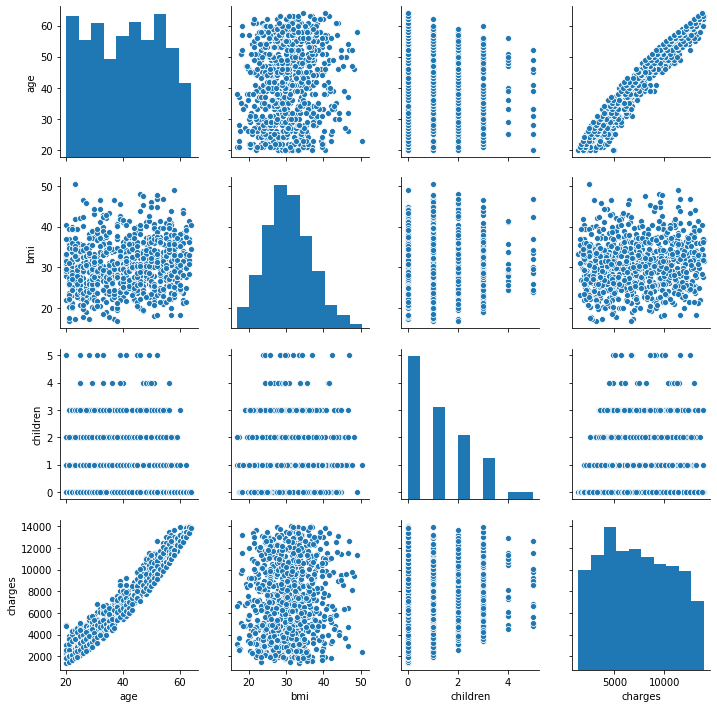

In [13]:
#Pairwise plots of numeric variables
sns.pairplot(insurance[['age','bmi','children','charges']])
plt.show()

In [14]:
## Plot the Correlation Plot
insuranceT=insurance[["age", "bmi", "children", "charges"]].values.T
insuranceT

array([[2.00000000e+01, 2.00000000e+01, 2.00000000e+01, ...,
        6.30000000e+01, 6.30000000e+01, 6.40000000e+01],
       [3.01150000e+01, 3.05900000e+01, 2.87850000e+01, ...,
        3.31000000e+01, 3.08000000e+01, 3.45000000e+01],
       [5.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.91505985e+03, 2.45972010e+03, 2.45721115e+03, ...,
        1.33937560e+04, 1.33905590e+04, 1.38228030e+04]])

In [15]:
## Getting insurance numeric variables correlation info
corrMatrix = np.corrcoef(insuranceT)
corrMatrix

array([[ 1.        ,  0.11184732, -0.09228825,  0.97406574],
       [ 0.11184732,  1.        ,  0.01276496,  0.09648351],
       [-0.09228825,  0.01276496,  1.        ,  0.07032596],
       [ 0.97406574,  0.09648351,  0.07032596,  1.        ]])

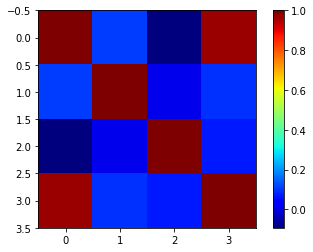

In [16]:
plt.imshow(corrMatrix, cmap='jet')
plt.colorbar()

### Create the Multiple Linear Regression Model

In [17]:
import statsmodels.api as sm

In [18]:
insurance=pd.get_dummies(data=insurance, columns=['gender','smoker','region'],drop_first=True) 
insurance.head(10)
##drop_first = True, mean n-1 of degree of freedom for category variables

,age,bmi,children,charges,gender_male,region_northwest,region_southeast,region_southwest
0,20,30.115,5,4915.05985,1,0,0,0
1,20,30.590,0,2459.72010,0,0,0,0
2,20,28.785,0,2457.21115,0,0,0,0
3,20,40.470,0,1984.45330,1,0,0,0
4,20,27.930,0,1967.02270,1,0,0,0
5,21,20.235,3,3861.20965,1,0,0,0
6,21,25.745,2,3279.86855,1,0,0,0
7,21,16.815,1,3167.45585,0,0,0,0
8,21,22.135,0,2585.85065,0,0,0,0
9,21,27.360,0,2104.11340,1,0,0,0


In [20]:
## Split the dataset to Train and Test set
train = insurance.drop(['charges'], axis = 1)
trainInput, testInput, trainOut, testOutput = train_test_split(train.values, insurance['charges'].values, test_size = 0.2, random_state=123)

In [21]:
trainInput.shape

(668, 7)

In [22]:
trainInput

array([[42.   , 34.1  ,  0.   , ...,  0.   ,  0.   ,  1.   ],
       [28.   , 26.51 ,  2.   , ...,  0.   ,  1.   ,  0.   ],
       [45.   , 20.35 ,  3.   , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [57.   , 31.825,  0.   , ...,  1.   ,  0.   ,  0.   ],
       [53.   , 24.32 ,  0.   , ...,  1.   ,  0.   ,  0.   ],
       [40.   , 36.19 ,  0.   , ...,  0.   ,  1.   ,  0.   ]])

In [24]:
## Add a column of 1s
trainInput2 = sm.add_constant(trainInput)
trainInput2.shape

(668, 8)

In [26]:
mlr = sm.OLS(trainOut, trainInput2)
model = mlr.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     5779.
Date:                Thu, 13 Aug 2020   Prob (F-statistic):               0.00
Time:                        22:21:07   Log-Likelihood:                -5016.4
No. Observations:                 668   AIC:                         1.005e+04
Df Residuals:                     660   BIC:                         1.008e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3898.6649    107.434    -36.289      0.0

In [28]:
predictTrainOut = model.predict(trainInput2)
np.sqrt(metrics.mean_squared_error(predictTrainOut, trainOut))

441.68941707044553

In [29]:
metrics.r2_score(predictTrainOut, trainOut)

0.9836854931758852

In [31]:
testInput2 = sm.add_constant(testInput, has_constant = 'add')
testInput2

array([[ 1.   , 40.   , 24.97 , ...,  0.   ,  1.   ,  0.   ],
       [ 1.   , 52.   , 23.18 , ...,  0.   ,  0.   ,  0.   ],
       [ 1.   , 54.   , 32.775, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 1.   , 60.   , 38.06 , ...,  0.   ,  1.   ,  0.   ],
       [ 1.   , 51.   , 39.5  , ...,  0.   ,  0.   ,  1.   ],
       [ 1.   , 24.   , 33.99 , ...,  0.   ,  1.   ,  0.   ]])

In [32]:
predTestOut = model.predict(testInput2)

In [33]:
np.sqrt(metrics.mean_squared_error(predTestOut, testOutput))

428.91492649159113